In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [101]:
import zipfile
zip_ref = zipfile.ZipFile("dataset and all.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [102]:
train_features = pd.read_csv("/content/training_set_features.csv")
test_features = pd.read_csv("/content/test_set_features.csv")
train_labels = pd.read_csv("/content/training_set_labels.csv")

In [103]:
train_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [104]:
train_features.columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [105]:
df = pd.concat([train_features, train_labels.drop(columns = ['respondent_id'])], axis = 1)
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [107]:
df = df.drop(columns = ['hhs_geo_region', 'employment_industry', 'employment_occupation', 'health_insurance'])
df.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [109]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   xyz_concern                  19642 non-null  float64
 2   xyz_knowledge                19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_xyz              19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_months 

In [110]:
df['age_group'].value_counts()

age_group
65+ Years        4491
55 - 64 Years    4234
45 - 54 Years    4038
18 - 34 Years    3925
35 - 44 Years    2954
Name: count, dtype: int64

In [111]:
df['education'].value_counts()

education
College Graduate    8165
Some College        5570
12 Years            4287
< 12 Years          1620
Name: count, dtype: int64

In [112]:
df['race'].value_counts()

race
White                15745
Black                 1474
Hispanic              1295
Other or Multiple     1128
Name: count, dtype: int64

In [113]:
df['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: count, dtype: int64

In [114]:
df['census_msa'].value_counts()

census_msa
MSA, Not Principle  City    8571
MSA, Principle City         5717
Non-MSA                     5354
Name: count, dtype: int64

In [115]:
df['employment_status'].value_counts()

employment_status
Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: count, dtype: int64

In [116]:
df['xyz_vaccine'].value_counts()

xyz_vaccine
0    15128
1     4514
Name: count, dtype: int64

In [117]:
df['seasonal_vaccine'].value_counts()

seasonal_vaccine
0    10254
1     9388
Name: count, dtype: int64

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])
df['education'] = le.fit_transform(df['education'])
df['income_poverty'] = le.fit_transform(df['income_poverty'])
df['employment_status'] = le.fit_transform(df['employment_status'])
df['sex'] = le.fit_transform(df['sex'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['rent_or_own'] = le.fit_transform(df['rent_or_own'])

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                19642 non-null  int64  
 1   xyz_concern                  19642 non-null  float64
 2   xyz_knowledge                19642 non-null  float64
 3   behavioral_antiviral_meds    19642 non-null  float64
 4   behavioral_avoidance         19642 non-null  float64
 5   behavioral_face_mask         19642 non-null  float64
 6   behavioral_wash_hands        19642 non-null  float64
 7   behavioral_large_gatherings  19642 non-null  float64
 8   behavioral_outside_home      19642 non-null  float64
 9   behavioral_touch_face        19642 non-null  float64
 10  doctor_recc_xyz              19642 non-null  float64
 11  doctor_recc_seasonal         19642 non-null  float64
 12  chronic_med_condition        19642 non-null  float64
 13  child_under_6_months 

In [121]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output = False)

In [122]:
categorical_cols = ['race', 'census_msa']

In [123]:
race_cencus_encoded = ohe.fit_transform(df[categorical_cols])

In [124]:
race_cencus_encoded_df = pd.DataFrame(race_cencus_encoded, columns = ['race_black', 'race_hispanic', 'race_other', 'race_white', 'msa_not_principle', 'msa_principle', 'non_msa'])
race_cencus_encoded_df.head()

,race_black,race_hispanic,race_other,race_white,msa_not_principle,msa_principle,non_msa
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [125]:
df = df.set_index('respondent_id')
X = df.drop(columns =['xyz_vaccine', 'seasonal_vaccine'])
y = df[['xyz_vaccine', 'seasonal_vaccine']]

In [126]:
X = X.drop(columns = ['race', 'census_msa'])

In [127]:
race_cencus_encoded_df = race_cencus_encoded_df.set_index(df.index)

In [128]:
X = pd.concat([df, race_cencus_encoded_df], axis = 1)

In [129]:
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,household_children,xyz_vaccine,seasonal_vaccine,race_black,race_hispanic,race_other,race_white,msa_not_principle,msa_principle,non_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3.0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [130]:
y.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
3,0,1
4,0,0
5,0,0


In [131]:
X = X.drop(columns = ['race', 'census_msa', 'xyz_vaccine', 'seasonal_vaccine'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  19642 non-null  float64
 1   xyz_knowledge                19642 non-null  float64
 2   behavioral_antiviral_meds    19642 non-null  float64
 3   behavioral_avoidance         19642 non-null  float64
 4   behavioral_face_mask         19642 non-null  float64
 5   behavioral_wash_hands        19642 non-null  float64
 6   behavioral_large_gatherings  19642 non-null  float64
 7   behavioral_outside_home      19642 non-null  float64
 8   behavioral_touch_face        19642 non-null  float64
 9   doctor_recc_xyz              19642 non-null  float64
 10  doctor_recc_seasonal         19642 non-null  float64
 11  chronic_med_condition        19642 non-null  float64
 12  child_under_6_months         19642 non-null  float64
 13  health_worker        

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15713, 36), (3929, 36), (15713, 2), (3929, 2))

In [134]:
!pip install scikit-multilearn

In [135]:

# using binary relevance
from sklearn.metrics import accuracy_score
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(SVC())
# train
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy =  0.6523288368541613


In [136]:
y1_train = y_train['xyz_vaccine']
y2_train = y_train['seasonal_vaccine']
y1_test = y_test['xyz_vaccine']
y2_test = y_test['seasonal_vaccine']

In [137]:
import tensorflow as tf
from tensorflow.keras import layers
model_dense = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')])

model_dense.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [138]:
history_1 = model_dense.fit(X_train, y1_train,
                            epochs=10,
                            validation_data = (X_test, y1_test))

Epoch 1/10
492/492 [==============================] - 5s 7ms/step - loss: 0.4630 - accuracy: 0.7958 - val_loss: 0.4561 - val_accuracy: 0.8007
Epoch 2/10
492/492 [==============================] - 2s 4ms/step - loss: 0.4114 - accuracy: 0.8222 - val_loss: 0.4227 - val_accuracy: 0.8254
Epoch 3/10
492/492 [==============================] - 2s 3ms/step - loss: 0.4007 - accuracy: 0.8270 - val_loss: 0.4137 - val_accuracy: 0.8277
Epoch 4/10
492/492 [==============================] - 2s 4ms/step - loss: 0.3955 - accuracy: 0.8269 - val_loss: 0.4105 - val_accuracy: 0.8272
Epoch 5/10
492/492 [==============================] - 2s 4ms/step - loss: 0.3917 - accuracy: 0.8293 - val_loss: 0.4096 - val_accuracy: 0.8264
Epoch 6/10
492/492 [==============================] - 3s 6ms/step - loss: 0.3894 - accuracy: 0.8315 - val_loss: 0.4073 - val_accuracy: 0.8282
Epoch 7/10
492/492 [==============================] - 4s 7ms/step - loss: 0.3881 - accuracy: 0.8341 - val_loss: 0.4071 - val_accuracy: 0.8313
Epoch 

In [139]:
model_dense_2 = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')])

model_dense_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [140]:
history_2 = model_dense_2.fit(X_train, y2_train,
                            epochs=10,
                            validation_data = (X_test, y2_test))

Epoch 1/10
492/492 [==============================] - 5s 7ms/step - loss: 0.5318 - accuracy: 0.7444 - val_loss: 0.5217 - val_accuracy: 0.7526
Epoch 2/10
492/492 [==============================] - 4s 8ms/step - loss: 0.4920 - accuracy: 0.7718 - val_loss: 0.5148 - val_accuracy: 0.7541
Epoch 3/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4825 - accuracy: 0.7772 - val_loss: 0.5060 - val_accuracy: 0.7574
Epoch 4/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4757 - accuracy: 0.7808 - val_loss: 0.5082 - val_accuracy: 0.7613
Epoch 5/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4723 - accuracy: 0.7853 - val_loss: 0.5145 - val_accuracy: 0.7577
Epoch 6/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4679 - accuracy: 0.7851 - val_loss: 0.5014 - val_accuracy: 0.7628
Epoch 7/10
492/492 [==============================] - 1s 2ms/step - loss: 0.4659 - accuracy: 0.7874 - val_loss: 0.5048 - val_accuracy: 0.7628
Epoch 

In [141]:
pred_1 = tf.squeeze(model_dense.predict(X_test)).numpy()
pred_2 = tf.squeeze(model_dense_2.predict(X_test)).numpy()
pred_1[:20], pred_2[:20]

123/123 [==============================] - 0s 1ms/step


(array([0.20024444, 0.8454021 , 0.12083925, 0.07809159, 0.0310938 ,
        0.01870303, 0.5174863 , 0.02602732, 0.21771173, 0.1283457 ,
        0.0856584 , 0.23542187, 0.19032273, 0.7721294 , 0.0992323 ,
        0.33097   , 0.11580888, 0.12701242, 0.41780767, 0.8347464 ],
       dtype=float32),
 array([0.47298115, 0.9254531 , 0.04597686, 0.02121775, 0.03044376,
        0.22680181, 0.04419571, 0.7231656 , 0.04577074, 0.6955517 ,
        0.17679073, 0.7435102 , 0.22134286, 0.1723389 , 0.18950017,
        0.09720148, 0.5910177 , 0.13895859, 0.9095006 , 0.9377256 ],
       dtype=float32))

In [142]:
final_model = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')])

final_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  19642 non-null  float64
 1   xyz_knowledge                19642 non-null  float64
 2   behavioral_antiviral_meds    19642 non-null  float64
 3   behavioral_avoidance         19642 non-null  float64
 4   behavioral_face_mask         19642 non-null  float64
 5   behavioral_wash_hands        19642 non-null  float64
 6   behavioral_large_gatherings  19642 non-null  float64
 7   behavioral_outside_home      19642 non-null  float64
 8   behavioral_touch_face        19642 non-null  float64
 9   doctor_recc_xyz              19642 non-null  float64
 10  doctor_recc_seasonal         19642 non-null  float64
 11  chronic_med_condition        19642 non-null  float64
 12  child_under_6_months         19642 non-null  float64
 13  health_worker        

In [144]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19642 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   xyz_vaccine       19642 non-null  int64
 1   seasonal_vaccine  19642 non-null  int64
dtypes: int64(2)
memory usage: 460.4 KB


In [145]:
y1 = y['xyz_vaccine']
y2 = y['seasonal_vaccine']

In [146]:
training_history_1 = final_model.fit(X.to_numpy(), y1.to_numpy(),
                                   epochs = 500,
                                   validation_split = 0.2,
                                   batch_size = 32,
                                   verbose = 1,
                                   callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50, restore_best_weights=True),
                                                tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 20)])

Epoch 1/500
492/492 [==============================] - 2s 3ms/step - loss: 0.4681 - accuracy: 0.7953 - val_loss: 0.4274 - val_accuracy: 0.8188 - lr: 0.0010
Epoch 2/500
492/492 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.8206 - val_loss: 0.4151 - val_accuracy: 0.8178 - lr: 0.0010
Epoch 3/500
492/492 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8275 - val_loss: 0.4073 - val_accuracy: 0.8239 - lr: 0.0010
Epoch 4/500
492/492 [==============================] - 1s 2ms/step - loss: 0.3977 - accuracy: 0.8277 - val_loss: 0.4103 - val_accuracy: 0.8223 - lr: 0.0010
Epoch 5/500
492/492 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8296 - val_loss: 0.4061 - val_accuracy: 0.8249 - lr: 0.0010
Epoch 6/500
492/492 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8279 - val_loss: 0.4030 - val_accuracy: 0.8259 - lr: 0.0010
Epoch 7/500
492/492 [==============================] - 1s 2ms/st

In [147]:
final_model_2 = tf.keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')])

final_model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [148]:
training_history_2 = final_model_2.fit(X.to_numpy(), y2.to_numpy(),
                                   epochs = 500,
                                   validation_split = 0.2,
                                   batch_size = 32,
                                   verbose = 1,
                                   callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50, restore_best_weights=True),
                                                tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience = 20)])

Epoch 1/500
492/492 [==============================] - 2s 2ms/step - loss: 0.5443 - accuracy: 0.7331 - val_loss: 0.5072 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 2/500
492/492 [==============================] - 1s 2ms/step - loss: 0.4955 - accuracy: 0.7668 - val_loss: 0.4894 - val_accuracy: 0.7730 - lr: 0.0010
Epoch 3/500
492/492 [==============================] - 1s 2ms/step - loss: 0.4858 - accuracy: 0.7766 - val_loss: 0.4850 - val_accuracy: 0.7704 - lr: 0.0010
Epoch 4/500
492/492 [==============================] - 1s 2ms/step - loss: 0.4788 - accuracy: 0.7801 - val_loss: 0.4873 - val_accuracy: 0.7709 - lr: 0.0010
Epoch 5/500
492/492 [==============================] - 1s 3ms/step - loss: 0.4748 - accuracy: 0.7793 - val_loss: 0.4788 - val_accuracy: 0.7796 - lr: 0.0010
Epoch 6/500
492/492 [==============================] - 1s 3ms/step - loss: 0.4717 - accuracy: 0.7801 - val_loss: 0.4756 - val_accuracy: 0.7826 - lr: 0.0010
Epoch 7/500
492/492 [==============================] - 2s 5ms/st

In [149]:
def plot_loss_curves(history):

  plt.figure(figsize = (7, 7))
  plt.plot(history.history['loss'], label = 'training')
  plt.plot(history.history['val_loss'], label = 'validation')
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(loc = 'upper right')
  plt.show()

  plt.figure(figsize = (7, 7))
  plt.plot(history.history['accuracy'], label = 'training')
  plt.plot(history.history['val_accuracy'], label = 'validation')
  plt.title("Accuracy Curve")
  plt.xlabel("Epochs")
  plt.ylabel("Acccuracy")
  plt.legend(loc = 'lower right')
  plt.show()

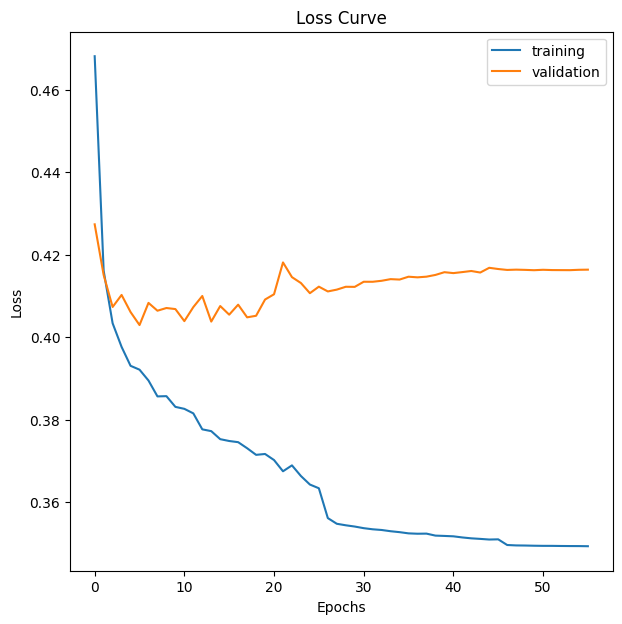

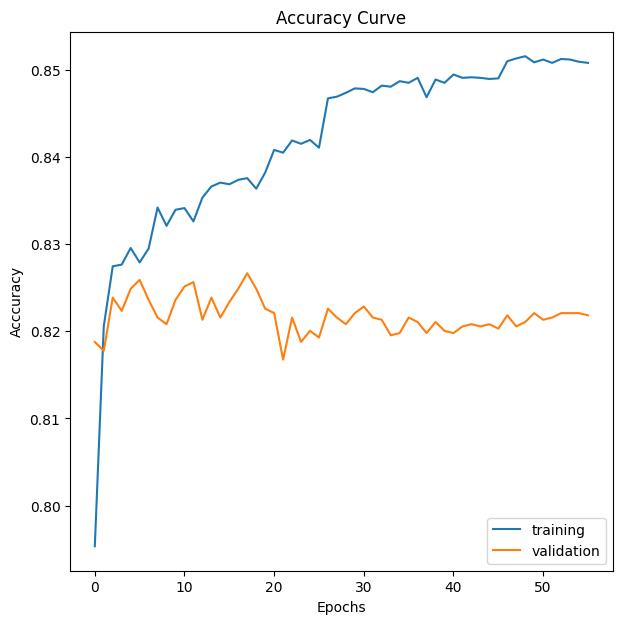

In [150]:
plot_loss_curves(training_history_1)

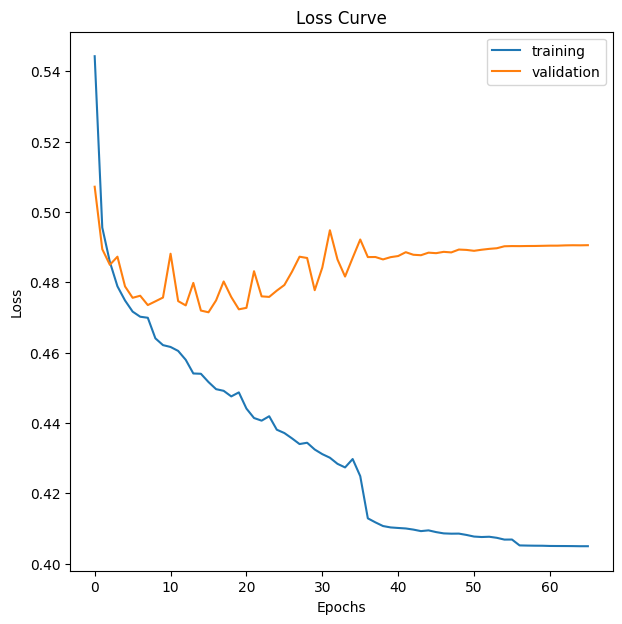

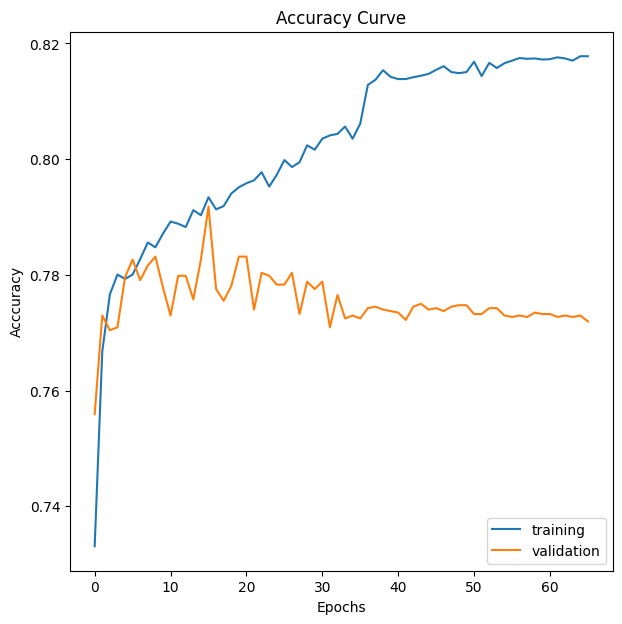

In [151]:
plot_loss_curves(training_history_2)

## Now test data preprocessing



In [152]:
test_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [153]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [154]:
test_features = test_features.drop(columns = ['hhs_geo_region', 'employment_industry', 'employment_occupation', 'health_insurance'])
test_features.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,Non-MSA,3.0,0.0
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,College Graduate,White,Male,"> $75,000",Married,Own,Employed,Non-MSA,1.0,0.0
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,1.0


In [155]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   xyz_concern                  26623 non-null  float64
 2   xyz_knowledge                26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_xyz              24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [156]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')

In [158]:
test_features.drop(columns = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']).columns

Index(['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [159]:
test_features[['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children']] = imputer.fit_transform(test_features[['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children']])

In [160]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  float64
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [161]:
test_features['education'].value_counts()

education
College Graduate    10186
Some College         7080
12 Years             5699
< 12 Years           2336
Name: count, dtype: int64

In [162]:
test_features['education'] = test_features['education'].fillna("College Graduate")

In [163]:
test_features['race'].value_counts()

race
White                21301
Black                 2174
Hispanic              1703
Other or Multiple     1530
Name: count, dtype: int64

In [164]:
test_features['race'] = test_features['race'].fillna("White")

In [165]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  float64
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [166]:
test_features['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    12775
> $75,000                     6863
Below Poverty                 2573
Name: count, dtype: int64

In [167]:
test_features['income_poverty'] = test_features['income_poverty'].fillna("<= $75,000, Above Poverty")

In [168]:
test_features['marital_status'].value_counts()

marital_status
Married        13548
Not Married    11718
Name: count, dtype: int64

In [169]:
test_features['marital_status'] = test_features['marital_status'].fillna("Not Married")

In [170]:
test_features['rent_or_own'].value_counts()

rent_or_own
Own     18721
Rent     5951
Name: count, dtype: int64

In [171]:
test_features['rent_or_own'] = test_features['rent_or_own'].fillna("Own")

In [172]:
test_features['employment_status'].value_counts()

employment_status
Employed              13632
Not in Labor Force    10092
Unemployed             1513
Name: count, dtype: int64

In [173]:
test_features['employment_status'] =test_features['employment_status'].fillna("Employed ")

In [177]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  float64
 1   xyz_concern                  26708 non-null  float64
 2   xyz_knowledge                26708 non-null  float64
 3   behavioral_antiviral_meds    26708 non-null  float64
 4   behavioral_avoidance         26708 non-null  float64
 5   behavioral_face_mask         26708 non-null  float64
 6   behavioral_wash_hands        26708 non-null  float64
 7   behavioral_large_gatherings  26708 non-null  float64
 8   behavioral_outside_home      26708 non-null  float64
 9   behavioral_touch_face        26708 non-null  float64
 10  doctor_recc_xyz              26708 non-null  float64
 11  doctor_recc_seasonal         26708 non-null  float64
 12  chronic_med_condition        26708 non-null  float64
 13  child_under_6_mo

In [178]:
cat_cols = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']

In [179]:
cat_cols_1 = ['age_group', 'education', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status']
cat_cols_2 = ['race', 'census_msa']

In [180]:
cat_df_1 = test_features[cat_cols_1]
cat_df_2 = test_features[cat_cols_2]

In [182]:
cat_df_1['age_group'] = le.fit_transform(cat_df_1['age_group'])
cat_df_1['education'] = le.fit_transform(cat_df_1['education'])
cat_df_1['sex'] = le.fit_transform(cat_df_1['sex'])
cat_df_1['income_poverty'] = le.fit_transform(cat_df_1['income_poverty'])
cat_df_1['marital_status'] = le.fit_transform(cat_df_1['marital_status'])
cat_df_1['rent_or_own'] = le.fit_transform(cat_df_1['rent_or_own'])
cat_df_1['employment_status'] = le.fit_transform(cat_df_1['employment_status'])

<ipython-input-182-2b8d777032a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df_1['age_group'] = le.fit_transform(cat_df_1['age_group'])
<ipython-input-182-2b8d777032a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df_1['education'] = le.fit_transform(cat_df_1['education'])
<ipython-input-182-2b8d777032a3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [183]:
cat_col_2_encoded =ohe.fit_transform(cat_df_2)

In [187]:
cat_col_2_encoded_df = pd.DataFrame(cat_col_2_encoded, columns = ['race_black', 'race_hispanic', 'race_other', 'race_white', 'msa_not_principle', 'msa_principle', 'non_msa'])
cat_col_2_encoded_df.head()

,race_black,race_hispanic,race_other,race_white,msa_not_principle,msa_principle,non_msa
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [188]:
num_cols_1 = ['respondent_id', 'xyz_concern', 'xyz_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

num_cols_2 = ['household_adults', 'household_children']

In [190]:
num_cols_df_1 = test_features[num_cols_1]
num_cols_df_2 = test_features[num_cols_2]
num_cols_df_1.set_index("respondent_id")

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc
respondent_id,,,,,,,,,,,,,,,,,,,,
26707.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,5.0,1.0,1.0
26708.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0
26709.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,2.0,5.0,4.0,4.0
26710.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,4.0,2.0
26711.0,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,4.0,2.0,1.0
53411.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,5.0,2.0,2.0
53412.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,4.0,3.0,1.0


In [191]:
num_cols_df_2.set_index(num_cols_df_1.index)

,household_adults,household_children
0,1.0,0.0
1,3.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
26703,1.0,1.0
26704,1.0,3.0
26705,1.0,0.0
26706,1.0,0.0


In [192]:
cat_df_1.set_index(num_cols_df_1.index)
cat_col_2_encoded_df.set_index(num_cols_df_1.index)

,race_black,race_hispanic,race_other,race_white,msa_not_principle,msa_principle,non_msa
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
26703,0.0,0.0,0.0,1.0,0.0,1.0,0.0
26704,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26705,0.0,0.0,0.0,1.0,1.0,0.0,0.0
26706,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [195]:
concat_1 = pd.concat([num_cols_df_1, cat_df_1], axis = 1)

In [196]:
concat_2 = pd.concat([concat_1, num_cols_df_2], axis = 1)

In [197]:
final_test = pd.concat([concat_2, cat_col_2_encoded_df], axis = 1)

In [199]:
final_test = final_test.set_index('respondent_id')
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26708 entries, 26707.0 to 53414.0
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26708 non-null  float64
 1   xyz_knowledge                26708 non-null  float64
 2   behavioral_antiviral_meds    26708 non-null  float64
 3   behavioral_avoidance         26708 non-null  float64
 4   behavioral_face_mask         26708 non-null  float64
 5   behavioral_wash_hands        26708 non-null  float64
 6   behavioral_large_gatherings  26708 non-null  float64
 7   behavioral_outside_home      26708 non-null  float64
 8   behavioral_touch_face        26708 non-null  float64
 9   doctor_recc_xyz              26708 non-null  float64
 10  doctor_recc_seasonal         26708 non-null  float64
 11  chronic_med_condition        26708 non-null  float64
 12  child_under_6_months         26708 non-null  float64
 13  health_worker

In [204]:
final_test.tail()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,employment_status,household_adults,household_children,race_black,race_hispanic,race_other,race_white,msa_not_principle,msa_principle,non_msa
respondent_id,,,,,,,,,,,,,,,,,,,,,
53410.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
53411.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
53412.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
53413.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
53414.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [203]:
y1_pred = tf.squeeze(final_model.predict(final_test.to_numpy())).numpy()
y2_pred = tf.squeeze(final_model_2.predict(final_test.to_numpy())).numpy()
y1_pred[:10], y2_pred[:10]

835/835 [==============================] - 1s 1ms/step


(array([0.04045872, 0.02885772, 0.55274564, 0.5270971 , 0.28032175,
        0.48620322, 0.26372418, 0.07037883, 0.02446047, 0.14977652],
       dtype=float32),
 array([0.10631223, 0.04128407, 0.8334542 , 0.9157342 , 0.44814357,
        0.9526776 , 0.35190347, 0.09464037, 0.10032594, 0.91258854],
       dtype=float32))

In [206]:
submission_df = pd.DataFrame({'xyz_vaccine': y1_pred, 'seasonal_vaccine': y2_pred}, columns= ['xyz_vaccine', 'seasonal_vaccine']).set_index(test_features['respondent_id'])
submission_df.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707.0,0.040459,0.106312
26708.0,0.028858,0.041284
26709.0,0.552746,0.833454
26710.0,0.527097,0.915734
26711.0,0.280322,0.448144


In [209]:
submission_csv = submission_df.to_csv('submission_sohan.csv', index=True)